## NOTE: TO BE DEPRECATED IN FAVOR OF modelling-002.ipynb

In [39]:
import pandas as pd
from collections import Counter

In [189]:
important_features = ['',
                      'acousticness',	'danceability',	'energy',	'instrumentalness',	'liveness',	'speechiness',	'tempo',	'valence',
                      'title', 'tag_cluster'
]

In [190]:
songs_w_tag_cluster = pd.read_parquet('../../data/features/featuresv7_w_tagclusters.parquet')
songs_w_tag_cluster.drop(columns=[('album','title')])

songs_w_tag_cluster.columns = songs_w_tag_cluster.columns.droplevel(0)
songs_w_tag_cluster = songs_w_tag_cluster.drop(columns=['tag'])
songs_w_tag_cluster = songs_w_tag_cluster[important_features]
songs_w_tag_cluster = songs_w_tag_cluster.drop_duplicates()
#songs_w_tag_cluster.head()
songs_w_tag_cluster.shape


(1115, 12)

In [180]:
features = ['acousticness',	'danceability',	'energy',	'instrumentalness',	'liveness',	'speechiness',	'tempo',	'valence']
songs_w_tag_cluster.groupby(['tag_cluster'])[features].mean()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
tag_cluster,,,,,,,,
1,0.497484,0.465941,0.537261,0.582012,0.191654,0.083351,123.592767,0.418543
2,0.622603,0.476976,0.514797,0.539339,0.178318,0.080464,122.331051,0.479906
3,0.484886,0.449267,0.578562,0.615991,0.188710,0.081921,124.704163,0.445552
4,0.481629,0.470848,0.558944,0.532192,0.174954,0.104186,124.077492,0.452094
5,0.525370,0.475834,0.509662,0.564309,0.173609,0.083202,124.191267,0.461842


In [181]:
songs_w_tag_cluster.groupby(['tag_cluster'])[features].std()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
tag_cluster,,,,,,,,
1,0.378090,0.180159,0.279292,0.382870,0.160006,0.117620,34.743064,0.272505
2,0.333177,0.154250,0.281762,0.384231,0.136907,0.133820,36.254667,0.286201
3,0.377386,0.181292,0.268588,0.359908,0.156203,0.124140,37.091283,0.273367
4,0.382998,0.179874,0.282729,0.389507,0.141509,0.173103,35.413357,0.276439
5,0.373198,0.171542,0.281232,0.394615,0.129241,0.136948,35.730786,0.283345


In [187]:
songs_w_tag_cluster[abs(songs_w_tag_cluster['acousticness']-0.625377)<0.333177][['tag_cluster']].value_counts()

tag_cluster
1              190
4              145
5               80
3               68
2               51
Name: count, dtype: int64

# Check Frequency Distribution of Features

In [151]:
#!pip install seaborn
#!pip install graphviz

In [119]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style("white")


In [117]:
songs_w_tag_cluster_grouped=[songs_w_tag_cluster[songs_w_tag_cluster['tag_cluster']==cluster] for cluster in range(1,6) ]
#songs_w_tag_cluster_grouped[0]
#songs_w_tag_cluster_grouped[0]['title'].head()

0.48146730302146284 0.3692525993786182
0.625376627368644 0.33739333778010966
0.4674837227093024 0.3873172333779754
0.46505315959926063 0.37937438085832786
0.517939458837829 0.3714348272939272


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 800x560 with 0 Axes>

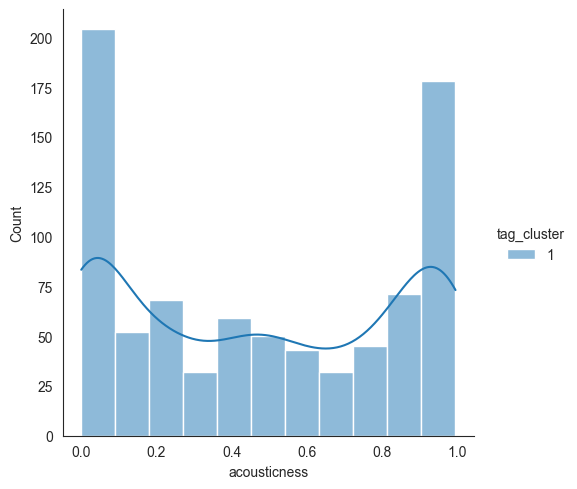

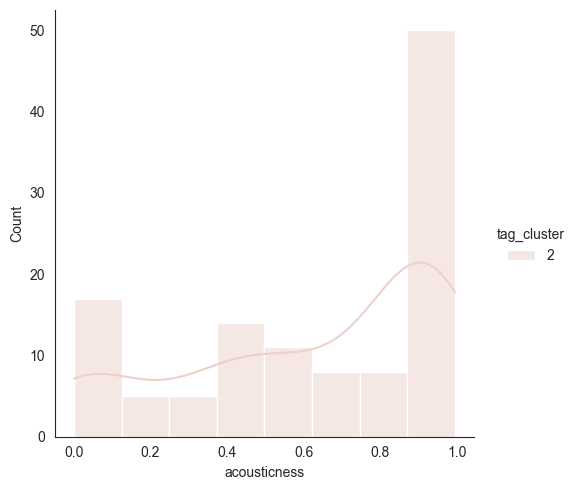

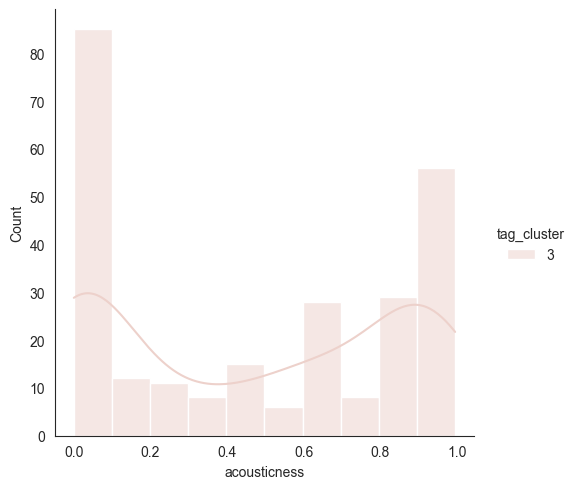

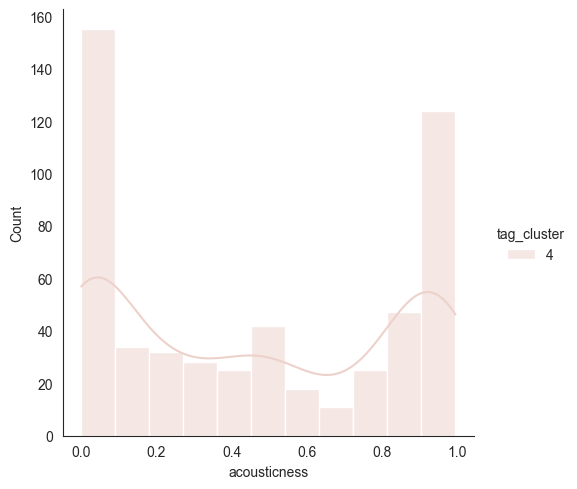

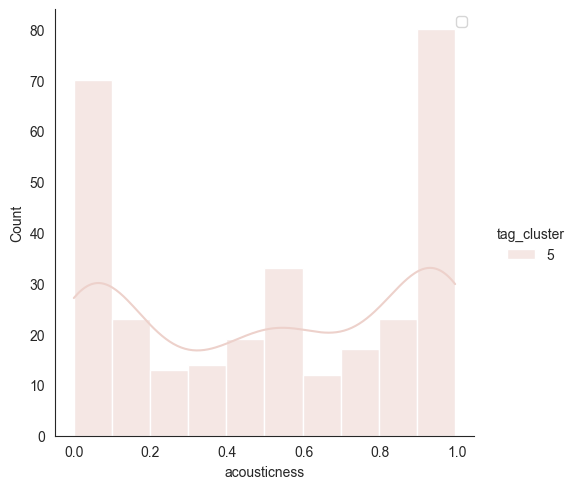

In [241]:
plt.figure(figsize=(10,7), dpi=80)

feature = 'acousticness'
for cluster in songs_w_tag_cluster_grouped:
    print(cluster[feature].mean(),cluster[feature].std())
    sns.displot(
        data=cluster, x=feature, hue='tag_cluster',kde=True
    )

#plt.xlim(0,1)
plt.legend()

# Supervised

## Decision Trees

In [191]:
songs_w_tag_cluster

,,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,title,title,tag_cluster
138,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Constant Hitmaker,Freeway,4
151,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Constant Hitmaker,Freeway,5
1149,201,0.991813,0.461855,0.543751,0.964922,0.137006,0.025688,93.945,0.758632,What I Know,Big City,4
1257,208,0.985727,0.416512,0.363310,0.783344,0.208498,0.033178,110.579,0.218291,Blue Piano,Safe Harbor,1
1266,209,0.995273,0.480661,0.575464,0.896955,0.369157,0.080062,96.053,0.222953,Blue Piano,Safe Harbor,1
...,...,...,...,...,...,...,...,...,...,...,...,...
576632,122765,0.000043,0.516557,0.867547,0.720066,0.390041,0.090491,120.091,0.186062,Forgotten Evils,Precious,1
577030,123563,0.000701,0.486093,0.871937,0.404973,0.315248,0.047375,127.846,0.422328,FMA Compilation,No Worries,1
577252,124139,0.005016,0.339160,0.606036,0.001531,0.109231,0.033636,172.792,0.344699,Live at Monty Hall for Todd-O-Phonic Todd's Sh...,Orpheus,4
577564,124141,0.010671,0.347581,0.883422,0.599232,0.341174,0.037460,134.254,0.730198,Live at Monty Hall for Todd-O-Phonic Todd's Sh...,Last Dance,4


In [192]:
X = songs_w_tag_cluster[
    ['acousticness',	'danceability',	'energy',	'instrumentalness',	'liveness',	'speechiness',	'tempo',	'valence']
]
y = songs_w_tag_cluster[['tag_cluster']]

In [193]:
#sample_size = X.shape
#sample_size

In [200]:

# Import the necessary libraries
from sklearn.datasets import load_iris
from sklearn import tree 
from sklearn.tree import export_graphviz
from graphviz import Source

# Load the dataset
# iris = load_iris()
# X = iris.data[:, 2:] # petal length and width
# y = iris.target




#DecisionTreeClassifier
tree_clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=30)
tree_clf.fit(X, y)
tree_clf.score(X,y)

#tree.plot_tree(tree_clf)

0.6484304932735426

In [192]:
tree_clf.score(X,y)
tree_clf.get_depth()

36

## XGBoost

In [198]:
#!pip install xgboost

In [226]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

In [249]:
features = ['acousticness',	'danceability',	'energy',	'instrumentalness',	'liveness',	'speechiness',	'tempo',	'valence']
features = ['energy']
#features = features + [f"{i:03d}" for i in range(0,224)]


X = songs_w_tag_cluster[features]
y = songs_w_tag_cluster[['tag_cluster']]
print(y.value_counts())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)

tag_cluster
1              416
4              321
5              165
3              135
2               78
Name: count, dtype: int64


c:\Users\g.agluba\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'Y' is not defined

In [209]:
## Standardize Data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# 
# scaler.fit(X)
# X = scaler.transform(X)
# X

In [54]:
##transform the dataset
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# 
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
# counter = Counter(y)
# print(counter)

In [38]:
# from itertools import combinations
# # Get all permutations of [1, 2, 3]
# feature_combinations = list()
# 
# for i in range(1,len(features)+1):
#     feature_combinations += list(combinations(features,i))
# 
# feature_combinations
# #X[list(feature_combinations[0])]

In [17]:
#feature_combinations

In [28]:
#numerical_features = [f"{i:03d}" for i in range(0,224)]
#numerical_features[0]

In [252]:

import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5 , random_state=1)


# Define hyperparameters
params = {"objective": "multi:softmax", "num_class": 5}
#evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]


#feature_combinations
#X[list(feature_combinations[0])]
#for _feature in feature_combinations:
#print(_feature)
#selected_features = list(_feature)

print("="*30)
print(f"Performing XGBoost for selected features: {features}")

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test)

n = 10
model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,

)

y_train_pred = model.predict(dtrain_reg)
y_test_pred = model.predict(dtest_reg)
y_test_pred

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
# print(accuracy_score(y_train,y_train_pred))
# print(accuracy_score(y_test,y_test_pred))
# print("="*30)

Performing XGBoost for selected features: ['energy']
              precision    recall  f1-score   support

           0       0.48      0.89      0.62       211
           1       0.57      0.11      0.19        36
           2       0.58      0.11      0.18        66
           3       0.55      0.48      0.51       162
           4       0.67      0.05      0.09        82

    accuracy                           0.50       557
   macro avg       0.57      0.33      0.32       557
weighted avg       0.55      0.50      0.43       557

              precision    recall  f1-score   support

           0       0.35      0.63      0.45       205
           1       0.10      0.02      0.04        42
           2       0.07      0.01      0.02        69
           3       0.26      0.25      0.25       159
           4       0.10      0.01      0.02        83

    accuracy                           0.31       558
   macro avg       0.18      0.19      0.16       558
weighted avg       0.23 

In [69]:
print(Counter(y_train),Counter(y_test))

Counter({0: 750, 3: 493, 4: 264, 2: 234, 1: 108}) Counter({0: 84, 3: 48, 4: 40, 2: 24, 1: 10})


In [520]:
songs_w_tag_cluster #= songs_w_tag_cluster[songs_w_tag_cluster['tag_cluster']==1]
#songs_w_tag_cluster.shape

VX = songs_w_tag_cluster[features]
VY = songs_w_tag_cluster[['tag_cluster']]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
VY = le.fit_transform(VY)
# #VY =  (VY-1).to_numpy().reshape(VY.shape[0],) #le.fit_transform(VY)
# 
VX_reg = xgb.DMatrix(VX)
vy_test_pred = model.predict(VX_reg)

(VY == vy_test_pred).sum()/VY.shape[0]

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# print(confusion_matrix(VY, vy_test_pred))
print(classification_report(VY, vy_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       912
           1       0.64      0.42      0.50        84
           2       0.65      0.51      0.57       118
           3       0.63      0.61      0.62       258
           4       0.62      0.61      0.61       452
           5       0.60      0.43      0.50       292

    accuracy                           0.66      2116
   macro avg       0.64      0.57      0.59      2116
weighted avg       0.66      0.66      0.65      2116



c:\Users\g.agluba\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [396]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2153
           1       0.92      0.99      0.95      2026
           2       0.95      1.00      0.98      1970
           3       0.86      0.86      0.86      1980
           4       0.78      0.81      0.79      2000
           5       0.87      0.79      0.83      2068

    accuracy                           0.87     12197
   macro avg       0.87      0.87      0.87     12197
weighted avg       0.87      0.87      0.87     12197



## Adaboost

### Adaboost with Decision Trees

In [73]:
X = songs_w_tag_cluster
X.shape

(2055, 305)

In [74]:
features = ['acousticness',	'danceability',	'energy',	'instrumentalness',	'liveness',	'speechiness',	'tempo',	'valence']
#features = features + [f"{i:03d}" for i in range(0,224)]
#features

X = songs_w_tag_cluster[features]
y = songs_w_tag_cluster[['tag_cluster']]
y.value_counts()

tag_cluster
1              834
4              541
5              304
3              258
2              118
Name: count, dtype: int64

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)
X.shape

c:\Users\g.agluba\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(2055, 8)

In [76]:
#transform the dataset
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# 
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
# counter = Counter(y)
# print(counter)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [78]:
## Building the Descision Tree Model
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
          max_depth=5,
          random_state=42)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.42      0.95      0.59       209
           1       0.20      0.04      0.06        27
           2       0.43      0.11      0.17        56
           3       0.50      0.07      0.13       137
           4       0.25      0.01      0.02        85

    accuracy                           0.42       514
   macro avg       0.36      0.24      0.19       514
weighted avg       0.40      0.42      0.30       514



In [79]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
           estimator=tree,
           n_estimators=100,
           learning_rate=0.001,
           random_state=42)

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

#ada_test = accuracy_score(y_test, y_test_pred)
#ada_train = accuracy_score(y_train, y_train_pred)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.46      0.82      0.59       209
           1       0.00      0.00      0.00        27
           2       0.43      0.11      0.17        56
           3       0.39      0.31      0.35       137
           4       0.25      0.04      0.06        85

    accuracy                           0.44       514
   macro avg       0.30      0.26      0.23       514
weighted avg       0.38      0.44      0.36       514



c:\Users\g.agluba\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\g.agluba\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\g.agluba\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## Neural Network

In [253]:
import torch
import torch.nn as nn
import torch.optim as optim

In [295]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [347]:
features = ['acousticness',	'danceability',	'energy',	'instrumentalness',	'liveness',	'speechiness',	'tempo',	'valence']
#features = features + [f"{i:03d}" for i in range(0,224)]

X = songs_w_tag_cluster[features]
y = songs_w_tag_cluster[['tag_cluster']]
X

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
138,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
151,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
1149,0.991813,0.461855,0.543751,0.964922,0.137006,0.025688,93.945,0.758632
1257,0.985727,0.416512,0.363310,0.783344,0.208498,0.033178,110.579,0.218291
1266,0.995273,0.480661,0.575464,0.896955,0.369157,0.080062,96.053,0.222953
...,...,...,...,...,...,...,...,...
576632,0.000043,0.516557,0.867547,0.720066,0.390041,0.090491,120.091,0.186062
577030,0.000701,0.486093,0.871937,0.404973,0.315248,0.047375,127.846,0.422328
577252,0.005016,0.339160,0.606036,0.001531,0.109231,0.033636,172.792,0.344699
577564,0.010671,0.347581,0.883422,0.599232,0.341174,0.037460,134.254,0.730198


In [348]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
#print(ohe.categories_)

y = ohe.transform(y)
print(y)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


In [256]:
#transform the dataset
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# 
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
# counter = Counter(y)
# print(counter)

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train  = X_train.to_numpy()
#y_train = y_train.to_numpy()
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_train.shape

X_test = torch.tensor(X_train, dtype=torch.float32)
y_test = torch.tensor(y_train, dtype=torch.float32)

#y_test


C:\Users\g.agluba\AppData\Local\Temp\ipykernel_33924\1373364177.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_train, dtype=torch.float32)
C:\Users\g.agluba\AppData\Local\Temp\ipykernel_33924\1373364177.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_train, dtype=torch.float32)


In [353]:
y_test

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.]])

In [363]:
model = nn.Sequential(
    nn.Linear(8, 64),
    nn.Tanh(),
    nn.Linear(64, 64),
    nn.Tanh(),
    nn.Linear(64, 5),
    nn.ReLU()
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 1000
batch_size = 8

for epoch in range(n_epochs):
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        #print(y_pred,ybatch)
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, training loss {loss}')

Finished epoch 0, training loss 1.4398776292800903
Finished epoch 1, training loss 1.4564818143844604
Finished epoch 2, training loss 1.4536447525024414
Finished epoch 3, training loss 1.443678379058838
Finished epoch 4, training loss 1.4375441074371338
Finished epoch 5, training loss 1.4348595142364502
Finished epoch 6, training loss 1.4335449934005737
Finished epoch 7, training loss 1.432115077972412
Finished epoch 8, training loss 1.4311139583587646
Finished epoch 9, training loss 1.4290103912353516
Finished epoch 10, training loss 1.4284188747406006
Finished epoch 11, training loss 1.426489233970642
Finished epoch 12, training loss 1.4248576164245605
Finished epoch 13, training loss 1.4223843812942505
Finished epoch 14, training loss 1.4203839302062988
Finished epoch 15, training loss 1.4185974597930908
Finished epoch 16, training loss 1.4175293445587158
Finished epoch 17, training loss 1.4170159101486206
Finished epoch 18, training loss 1.416463017463684
Finished epoch 19, trainin

In [315]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_test_pred = model(X_test)
y_test_pred
print(classification_report(y_test, y_test_pred))


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

## KNN

In [110]:
features = ['acousticness',	'danceability',	'energy',	'instrumentalness',	'liveness',	'speechiness',	'tempo',	'valence']
features = features + [f"{i:03d}" for i in range(0,224)]

features = [f"{i:03d}" for i in range(0,224)]

X = songs_w_tag_cluster[features]
y = songs_w_tag_cluster[['tag_cluster']]

le = LabelEncoder()

y = le.fit_transform(y)
X.head()

c:\Users\g.agluba\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,000,001,002,003,004,005,006,007,008,009,...,214,215,216,217,218,219,220,221,222,223
138,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,...,-3.662988,21.508228,0.283352,0.26707,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
151,0.311404,0.711402,0.321914,0.500601,0.250963,0.321316,0.734250,0.325188,0.373012,0.235840,...,-3.662988,21.508228,0.283352,0.26707,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
1149,0.440711,0.496262,0.441215,0.554697,0.236986,0.383395,0.331709,0.398409,0.382057,0.425030,...,-2.502959,9.852509,0.363993,0.32376,0.123395,0.06612,7.71116,7.64504,16.298227,330.650909
1183,0.440711,0.496262,0.441215,0.554697,0.236986,0.383395,0.331709,0.398409,0.382057,0.425030,...,-2.502959,9.852509,0.363993,0.32376,0.123395,0.06612,7.71116,7.64504,16.298227,330.650909
1257,0.283386,0.261578,0.391424,0.095289,0.396610,0.073262,0.164888,0.357120,0.119581,0.302196,...,-3.919995,36.820629,0.323881,0.28404,0.050928,0.06354,4.66186,4.59832,10.256566,169.976181


In [111]:
## Standardize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
X

array([[-0.73074722,  1.83711682, -0.22750838, ...,  1.2752475 ,
         2.33344076,  2.02586985],
       [-0.73074722,  1.83711682, -0.22750838, ...,  1.2752475 ,
         2.33344076,  2.02586985],
       [ 0.07364051,  0.5171155 ,  0.63370158, ...,  1.06812587,
         1.47340012,  1.14631468],
       ...,
       [ 0.43704383,  0.08916439,  0.12150931, ..., -0.27777216,
        -0.43448302, -0.46535419],
       [ 0.43704383,  0.08916439,  0.12150931, ..., -0.27777216,
        -0.43448302, -0.46535419],
       [ 0.43704383,  0.08916439,  0.12150931, ..., -0.27777216,
        -0.43448302, -0.46535419]])

In [305]:
#transform the dataset
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 8131, 5: 8131, 4: 8131, 3: 8131, 1: 8131, 2: 8131})


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [113]:
Counter(y)

Counter({0: 834, 3: 541, 4: 304, 2: 258, 1: 118})

In [114]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.61      0.63      0.62       209
           1       0.22      0.33      0.26        27
           2       0.34      0.36      0.35        56
           3       0.45      0.38      0.41       137
           4       0.33      0.32      0.32        85

    accuracy                           0.47       514
   macro avg       0.39      0.40      0.39       514
weighted avg       0.47      0.47      0.47       514



array([5, 4, 4, ..., 4, 4, 4], dtype=int64)

# Unsupervised Learning